In [1]:
import h5py
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D4

import numpy as np

from pathlib import Path
from tqdm import tqdm
from typing import List


In [2]:
train_data_path = '/home/hasumi/flower_libtorch/examples/quickstart_cpp/train.h5'
test_data_path = '/home/hasumi/flower_libtorch/examples/quickstart_cpp/test.h5'

In [8]:
with h5py.File(test_data_path, 'r') as file:
    def print_name(name):
        print(name)
    file.visit(print_name)

data
faceId
label
normal


In [14]:
# HDF5ファイルを読み込む
with h5py.File(train_data_path, 'r') as file:
    # ファイル内のデータセットを読み込む
    train_data = file['data'][()]
    print(train_data.shape)
    # print(train_data)
    train_label = file['label'][()]
    print(train_label.shape)
    # print(train_label)

# HDF5ファイルを読み込む
with h5py.File(test_data_path, 'r') as file:
    # ファイル内のデータセットを読み込む
    test_data = file['data'][()]
    print(test_data.shape)
    # print(test_data)
    test_label = file['label'][()]
    print(test_label.shape)
    # print(test_label)

(2048, 2048, 3)
(2048, 1)
(420, 2048, 3)
(420, 1)


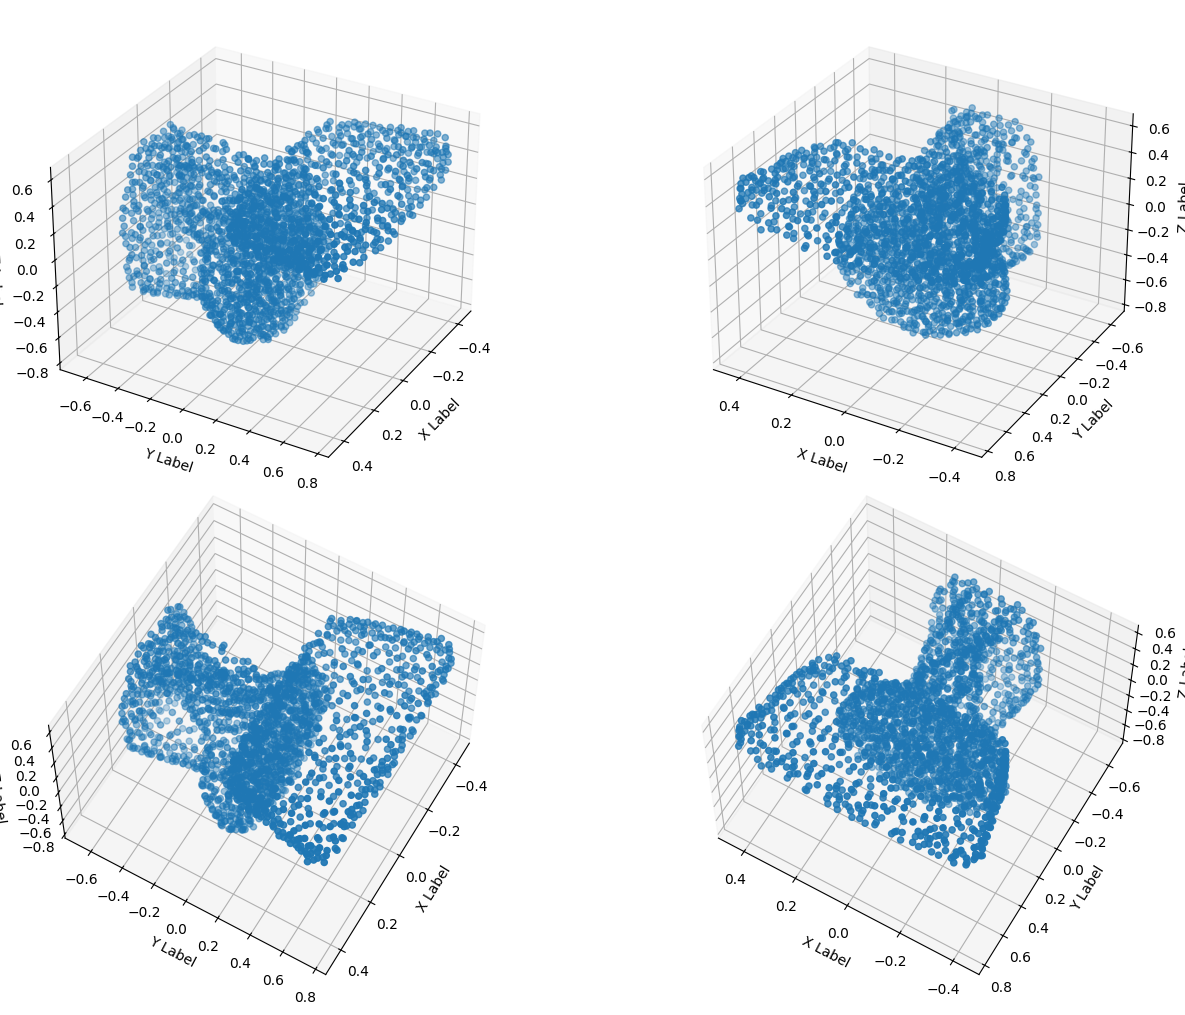

In [15]:
# 3Dプロットを作成
fig = plt.figure(figsize=(15, 10))

data_idx = 6

# 複数の視点でプロットを作成
for i, angle in enumerate([(30, 30), (30, 120), (60, 30), (60, 120)]):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    # データの座標
    x = train_data[data_idx][:, 0]
    y = train_data[data_idx][:, 1]
    z = train_data[data_idx][:, 2]

    # 点群をプロット
    ax.scatter(x, y, z)

    # 軸のラベル
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # 視点を設定
    ax.view_init(elev=angle[0], azim=angle[1])

# 表示
plt.tight_layout()  # グラフが重ならないように自動調整
plt.show()

In [16]:
# data_num = 2048
# train_num = data_num * 0.8
# test_num = data_num * 0.2
train_num = 2048
test_num = 420

In [17]:
def label_to_output(labels: List[str], mode: str):
    if mode == "train":
        output_file_name = Path(f"data/train_label.cpp")
        num = int(train_num)
    elif mode == "test":
        output_file_name = Path(f"data/test_label.cpp")
        num = int(test_num)

    labels = [str(int(lbl)) for lbl in labels]

    with output_file_name.open(mode="w") as f:

        if mode == "train":
            f.write("static int64_t train_labelset[" + str(num) + "] = {")
        elif mode == "test":
            f.write("static int64_t test_labelset[" + str(num) + "] = {")

        for i in range(num):
            f.write(labels[i])
            if i < num - 1:
                f.write(", ")
        f.write("};\n")
    

In [20]:
def data_to_output(data: List[np.ndarray], mode: str):
    if mode == "train":
        output_file_name = Path(f"data/train_data.cpp")
        num = int(train_num)
    elif mode == "test":
        output_file_name = Path(f"data/test_data.cpp")
        num = int(test_num)

    with output_file_name.open(mode="w") as f:
        if mode == "train":
            f.write("static float train_dataset[" + str(num) + "][2048][3] = {\n")
        elif mode == "test":
            f.write("static float test_dataset[" + str(num) + "][2048][3] = {\n")

        for i in tqdm(range(num)):
            f.write("{")
            for j in range(2048):
                f.write("{")
                f.write(str(data[i][j][0]) + ", " + str(data[i][j][1]) + ", " + str(data[i][j][2]))
                f.write("}")
                if j != 2047:
                    f.write(", ")
                elif i != num - 1:
                    f.write("},\n")
                else:
                    f.write("}\n")

        f.write("};")

In [21]:
label_to_output(train_label, "train")
data_to_output(train_data, "train")
label_to_output(test_label, "test")
data_to_output(test_data, "test")

  0%|          | 0/2048 [00:00<?, ?it/s]

100%|██████████| 420/420 [00:01<00:00, 215.16it/s]


In [23]:
def check_label_to_output(labels: List[str]):
    output_file_name = Path(f"data/check_train_label.cpp")
    num = 1

    labels = [str(int(lbl)) for lbl in labels]

    with output_file_name.open(mode="w") as f:
        f.write("static int64_t check_train_labelset[" + str(num) + "] = {")

        for i in range(num):
            f.write(labels[i])
            if i < num - 1:
                f.write(", ")
        f.write("};\n")

check_label_to_output(train_label)    

In [24]:
def check_data_to_output(data: List[np.ndarray]):
    output_file_name = Path(f"data/check_train_data.cpp")
    num = 1

    with output_file_name.open(mode="w") as f:
        f.write("static float check_train_dataset[1][2048][3] = {\n")

        for i in tqdm(range(num)):
            f.write("{")
            for j in range(2048):
                f.write("{")
                f.write(str(data[i][j][0]) + ", " + str(data[i][j][1]) + ", " + str(data[i][j][2]))
                f.write("}")
                if j != 2047:
                    f.write(", ")
                elif i != num - 1:
                    f.write("},\n")
                else:
                    f.write("}\n")

        f.write("};")

check_data_to_output(train_data)

100%|██████████| 1/1 [00:00<00:00, 131.42it/s]
